# Comparación de Modelos: Tradicionales vs Neuronales

Este notebook compara dos enfoques para clasificación de texto:
- **Modelos Tradicionales** (Logistic, SVM, RF) → Clasificación de **Sentimiento**
- **Redes Neuronales** (FNN, CNN, LSTM) → Clasificación de **Tipo de Queja**

**Total: 6 modelos**

In [1]:
# Imports y configuración
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.preprocessing import (
    preprocess_dataframe, 
    vectorize_dataframe,
    prepare_complaint_labels
)
from src.traditional.models import train_and_compare_models, TraditionalClassifier
from src.neural.models import train_and_compare_neural_models, NeuralClassifier
from src.neural.complaint_models import (
    train_and_compare_complaint_models, 
    ComplaintClassifier,
    COMPLAINT_CATEGORIES
)

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
print("Módulos cargados correctamente.")

Módulos cargados correctamente.


## 1. Carga y Preprocesamiento de Datos

In [2]:
# Cargar dataset
df = pd.read_csv('../respuestas_cafeteria.csv')
print(f"Total de registros: {len(df)}")

print(f"\n--- Distribución de SENTIMIENTOS ---")
print(df['kind_of_comment'].value_counts())

print(f"\n--- Distribución de QUEJAS ---")
print(df['complaint'].value_counts(dropna=False))

df.head()

Total de registros: 1000

--- Distribución de SENTIMIENTOS ---
kind_of_comment
negativo    485
positivo    343
neutro      172
Name: count, dtype: int64

--- Distribución de QUEJAS ---
complaint
NaN              515
sabor            165
precio           160
variedad         105
instalaciones     55
Name: count, dtype: int64


,role,genre,age,comment,kind_of_comment,complaint
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio


In [3]:
# Preprocesar texto (para modelos tradicionales y neuronales de texto)
df = preprocess_dataframe(df, text_column='comment', output_column='clean_comment')

# Vectorizar con spaCy (para modelos neuronales de quejas)
df = vectorize_dataframe(df, text_column='comment', output_column='vector')

# Preparar etiquetas de quejas
df, complaint_names = prepare_complaint_labels(df, complaint_column='complaint')

print(f"Datos preprocesados: {len(df)} registros")
df.head()

100%|██████████| 991/991 [00:06<00:00, 154.45it/s]

Datos preprocesados: 991 registros


,role,genre,age,comment,kind_of_comment,complaint,clean_comment,vector,complaint_category
0,alumno,hombre,29,El precio de la comida está carísimo para lo q...,negativo,precio,precio comida carísimo entregar,"[-0.14875248, 2.44785, -1.1195225, 1.2586325, ...",0
1,trabajador,hombre,48,"Todo bien, gracias por mantener la cafetería o...",neutro,NaN,todo bien gracias mantener cafetería ordenado,"[0.15680596, 0.423218, 0.36181802, 0.18416801,...",1
2,madre,mujer,69,"Como madre de familia, el sabor de la comida d...",negativo,sabor,como madre familio sabor comida cafetería univ...,"[-0.181757, 1.1510206, -0.35793504, -0.1755714...",2
3,alumno,mujer,20,Me encanta la vibra de la cafetería; siempre h...,positivo,NaN,encantar vibrar cafetería siempre buen ambient...,"[-0.054130316, -0.1566243, -0.050648537, 0.783...",1
4,alumno,hombre,25,El precio está caro para lo que ofrecen y la a...,negativo,precio,precio caro ofrecer atención dejar desear,"[-0.22298999, 2.124965, -0.8448151, 0.10090916...",0


In [4]:
# Definir variables para ambas tareas
X_text = df['clean_comment']           # Para modelos de texto
X_vectors = np.vstack(df['vector'].values)  # Para modelos con embeddings spaCy

y_sentiment = df['kind_of_comment']    # Etiquetas de sentimiento
y_complaint = df['complaint_category'] # Etiquetas de tipo de queja

print(f"Muestras: {len(X_text)}")
print(f"Vector shape: {X_vectors.shape}")
print(f"\nClases de sentimiento: {y_sentiment.unique()}")
print(f"Clases de queja: {sorted(y_complaint.unique())}")

Muestras: 991
Vector shape: (991, 300)

Clases de sentimiento: ['negativo' 'neutro' 'positivo']
Clases de queja: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


## 2. Modelos TRADICIONALES → Clasificación de SENTIMIENTO

Entrenamos 3 modelos tradicionales (TF-IDF + clasificador) para predecir sentimiento.

In [5]:
# Entrenar y comparar modelos tradicionales para SENTIMIENTO
print("="*60)
print("MODELOS TRADICIONALES - CLASIFICACIÓN DE SENTIMIENTO")
print("="*60)
sentiment_traditional_results, sentiment_splits_trad = train_and_compare_models(X_text, y_sentiment)

MODELOS TRADICIONALES - CLASIFICACIÓN DE SENTIMIENTO

Entrenando: LOGISTIC
Accuracy: 0.9548
              precision    recall  f1-score   support

    negativo       0.98      0.99      0.98        96
      neutro       0.89      0.94      0.91        34
    positivo       0.95      0.91      0.93        69

    accuracy                           0.95       199
   macro avg       0.94      0.95      0.94       199
weighted avg       0.96      0.95      0.95       199


Entrenando: SVM
Accuracy: 0.9598
              precision    recall  f1-score   support

    negativo       0.98      1.00      0.99        96
      neutro       0.89      0.94      0.91        34
    positivo       0.97      0.91      0.94        69

    accuracy                           0.96       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.96      0.96      0.96       199


Entrenando: RANDOM_FOREST
Accuracy: 0.9598
              precision    recall  f1-score   support

    negativo 

## 3. Modelos NEURONALES → Clasificación de TIPO DE QUEJA

Entrenamos 3 redes neuronales (FNN, CNN, LSTM) con embeddings de spaCy para clasificar quejas.

In [6]:
# Entrenar redes neuronales para QUEJAS (usando vectores de spaCy)
print("="*60)
print("MODELOS NEURONALES - CLASIFICACIÓN DE TIPO DE QUEJA")
print("="*60)
complaint_neural_results, complaint_splits_neural = train_and_compare_complaint_models(
    X_vectors, y_complaint.values,
    epochs=100,
    batch_size=32
)

MODELOS NEURONALES - CLASIFICACIÓN DE TIPO DE QUEJA
Train: 693, Val: 99, Test: 199

Entrenando: FNN (Quejas)
Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7172 - loss: 0.8343 - val_accuracy: 0.9293 - val_loss: 0.1658
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8975 - loss: 0.3069 - val_accuracy: 0.9495 - val_loss: 0.1495
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9423 - loss: 0.1759 - val_accuracy: 0.9899 - val_loss: 0.0430
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9567 - loss: 0.1245 - val_accuracy: 0.9798 - val_loss: 0.0828
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9625 - loss: 0.1176 - val_accuracy: 0.9899 - val_loss: 0.0172
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.0681 - val_accuracy: 0.9798 - val_loss: 0.0532
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0928 - val_accuracy: 0.9899 - val_loss: 0.0310
E

## 4. Comparación Final

In [7]:
# Mostrar métricas completas por modelo
def print_metrics_table(results, task_name, model_category):
    print(f"\n{'='*70}")
    print(f"{model_category} - {task_name}")
    print('='*70)
    print(f"{'Modelo':<15} {'Accuracy':>10} {'Precision':>10} {'Recall':>10} {'F1-Macro':>10} {'F1-Weighted':>12}")
    print("-"*70)
    for model_name, result in results.items():
        r = result['results']
        print(f"{model_name.upper():<15} {r['accuracy']:>10.4f} {r['precision_macro']:>10.4f} {r['recall_macro']:>10.4f} {r['f1_macro']:>10.4f} {r['f1_weighted']:>12.4f}")
    return results

# Resultados SENTIMIENTO (Tradicionales)
print_metrics_table(sentiment_traditional_results, "SENTIMIENTO", "MODELOS TRADICIONALES")

# Resultados QUEJAS (Neuronales)  
print_metrics_table(complaint_neural_results, "TIPO DE QUEJA", "MODELOS NEURONALES")


MODELOS TRADICIONALES - SENTIMIENTO
Modelo            Accuracy  Precision     Recall   F1-Macro  F1-Weighted
----------------------------------------------------------------------
LOGISTIC            0.9548     0.9409     0.9479     0.9440       0.9547
SVM                 0.9598     0.9459     0.9514     0.9481       0.9597
RANDOM_FOREST       0.9598     0.9451     0.9627     0.9518       0.9598

MODELOS NEURONALES - TIPO DE QUEJA
Modelo            Accuracy  Precision     Recall   F1-Macro  F1-Weighted
----------------------------------------------------------------------
FNN                 0.9698     0.9811     0.9349     0.9556       0.9695
CNN                 0.9347     0.9627     0.8087     0.8479       0.9275
LSTM                0.6935     0.5043     0.4936     0.4936       0.6662


{'fnn': {'classifier': <src.neural.complaint_models.ComplaintClassifier at 0x1f816abb140>,
  'results': {'model_type': 'fnn',
   'accuracy': 0.9698492462311558,
   'precision_macro': 0.9811320754716981,
   'recall_macro': 0.9348718078152842,
   'f1_macro': 0.9556169225235759,
   'f1_weighted': 0.969487179193606,
   'classification_report': '                     precision    recall  f1-score   support\n\n         Por precio       1.00      0.97      0.98        32\n            Ninguna       0.96      0.99      0.98       103\n      Por alimentos       0.96      0.96      0.96        53\nPor infraestructura       1.00      0.82      0.90        11\n\n           accuracy                           0.97       199\n          macro avg       0.98      0.93      0.96       199\n       weighted avg       0.97      0.97      0.97       199\n',
   'confusion_matrix': array([[ 31,   0,   1,   0],
          [  0, 102,   1,   0],
          [  0,   2,  51,   0],
          [  0,   2,   0,   9]]),
   '

### 4.1 Visualización Comparativa

In [8]:
# Preparar datos para gráfico con múltiples métricas
all_results = []

# Tradicionales (Sentimiento) - Métrica principal: F1-Macro
for model_name, result in sentiment_traditional_results.items():
    r = result['results']
    all_results.append({
        'Modelo': model_name.upper(),
        'Tarea': 'Sentimiento',
        'Tipo': 'Tradicional',
        'Accuracy': r['accuracy'],
        'F1-Macro': r['f1_macro'],
        'F1-Weighted': r['f1_weighted'],
        'Recall': r['recall_macro']
    })

# Neuronales (Quejas) - Métrica principal: F1-Weighted (clases muy desbalanceadas)
for model_name, result in complaint_neural_results.items():
    r = result['results']
    all_results.append({
        'Modelo': model_name.upper(),
        'Tarea': 'Tipo de Queja',
        'Tipo': 'Red Neuronal',
        'Accuracy': r['accuracy'],
        'F1-Macro': r['f1_macro'],
        'F1-Weighted': r['f1_weighted'],
        'Recall': r['recall_macro']
    })

comparison_df = pd.DataFrame(all_results)
print(comparison_df.to_string(index=False))

       Modelo         Tarea         Tipo  Accuracy  F1-Macro  F1-Weighted   Recall
     LOGISTIC   Sentimiento  Tradicional  0.954774  0.944025     0.954741 0.947934
          SVM   Sentimiento  Tradicional  0.959799  0.948092     0.959682 0.951407
RANDOM_FOREST   Sentimiento  Tradicional  0.959799  0.951786     0.959785 0.962711
          FNN Tipo de Queja Red Neuronal  0.969849  0.955617     0.969487 0.934872
          CNN Tipo de Queja Red Neuronal  0.934673  0.847924     0.927549 0.808706
         LSTM Tipo de Queja Red Neuronal  0.693467  0.493644     0.666223 0.493584


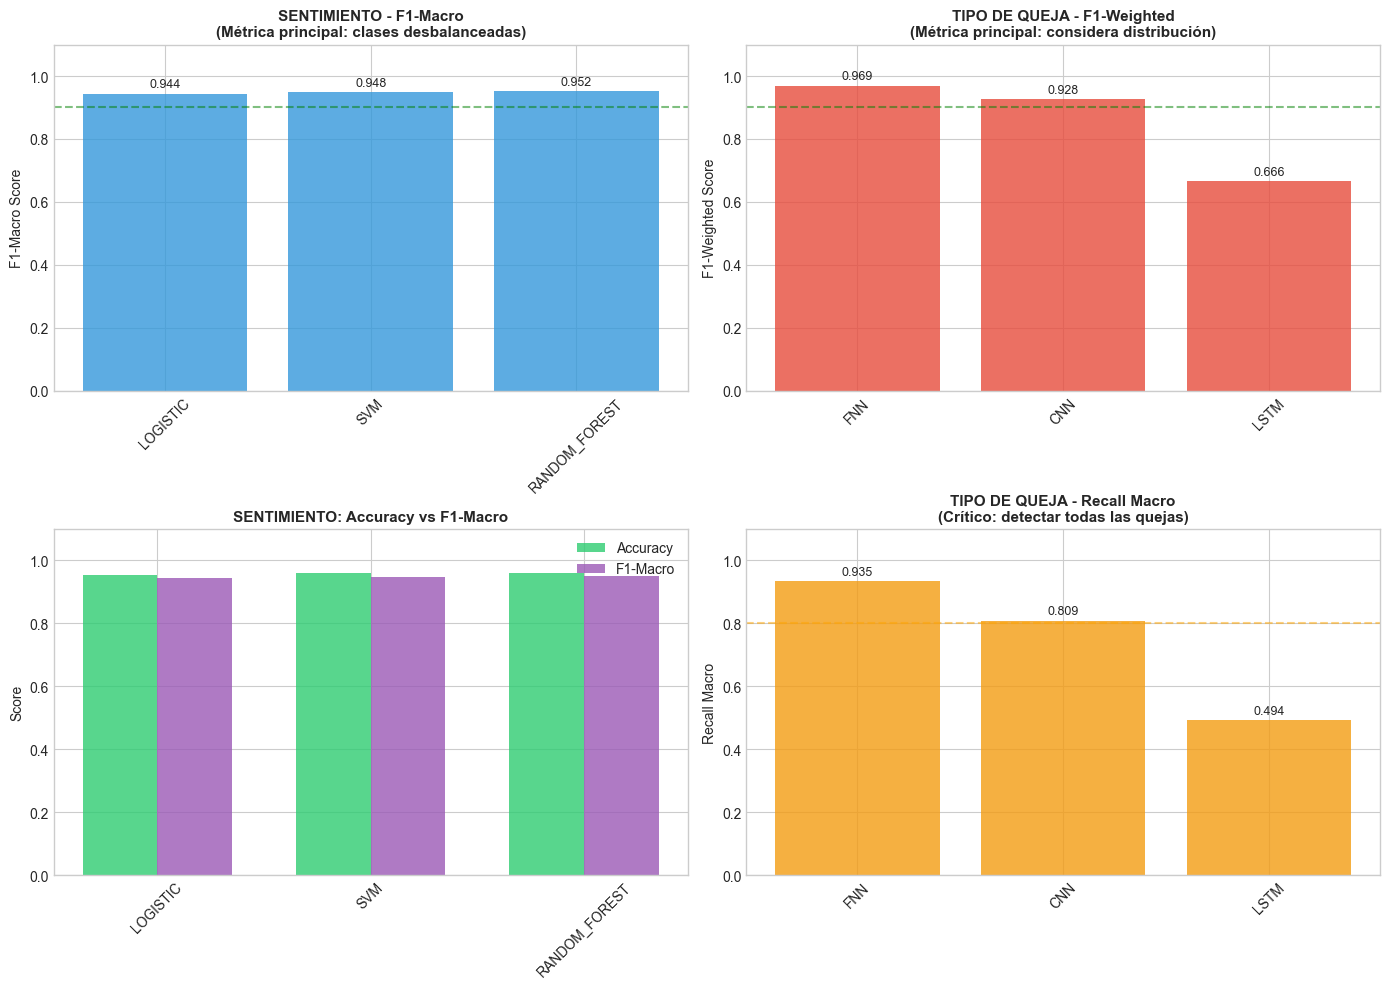

In [9]:
# Gráfico comparativo con múltiples métricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colores
colors_sent = '#3498db'  # Azul para tradicionales
colors_comp = '#e74c3c'  # Rojo para neuronales

# === GRÁFICO 1: Sentimiento - F1-Macro (métrica principal) ===
ax1 = axes[0, 0]
sent_df = comparison_df[comparison_df['Tarea'] == 'Sentimiento']
bars1 = ax1.bar(sent_df['Modelo'], sent_df['F1-Macro'], color=colors_sent, alpha=0.8)
for bar, val in zip(bars1, sent_df['F1-Macro']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)
ax1.set_title('SENTIMIENTO - F1-Macro\n(Métrica principal: clases desbalanceadas)', fontsize=11, fontweight='bold')
ax1.set_ylabel('F1-Macro Score')
ax1.set_ylim(0, 1.1)
ax1.axhline(y=0.9, color='green', linestyle='--', alpha=0.5, label='Umbral 0.9')
ax1.tick_params(axis='x', rotation=45)

# === GRÁFICO 2: Quejas - F1-Weighted (métrica principal) ===
ax2 = axes[0, 1]
comp_df = comparison_df[comparison_df['Tarea'] == 'Tipo de Queja']
bars2 = ax2.bar(comp_df['Modelo'], comp_df['F1-Weighted'], color=colors_comp, alpha=0.8)
for bar, val in zip(bars2, comp_df['F1-Weighted']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)
ax2.set_title('TIPO DE QUEJA - F1-Weighted\n(Métrica principal: considera distribución)', fontsize=11, fontweight='bold')
ax2.set_ylabel('F1-Weighted Score')
ax2.set_ylim(0, 1.1)
ax2.axhline(y=0.9, color='green', linestyle='--', alpha=0.5, label='Umbral 0.9')
ax2.tick_params(axis='x', rotation=45)

# === GRÁFICO 3: Comparación Accuracy vs F1-Macro (Sentimiento) ===
ax3 = axes[1, 0]
x = np.arange(len(sent_df))
width = 0.35
bars3a = ax3.bar(x - width/2, sent_df['Accuracy'], width, label='Accuracy', color='#2ecc71', alpha=0.8)
bars3b = ax3.bar(x + width/2, sent_df['F1-Macro'], width, label='F1-Macro', color='#9b59b6', alpha=0.8)
ax3.set_title('SENTIMIENTO: Accuracy vs F1-Macro', fontsize=11, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(sent_df['Modelo'])
ax3.set_ylabel('Score')
ax3.set_ylim(0, 1.1)
ax3.legend()
ax3.tick_params(axis='x', rotation=45)

# === GRÁFICO 4: Quejas - Recall (importante no perder quejas) ===
ax4 = axes[1, 1]
bars4 = ax4.bar(comp_df['Modelo'], comp_df['Recall'], color='#f39c12', alpha=0.8)
for bar, val in zip(bars4, comp_df['Recall']):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)
ax4.set_title('TIPO DE QUEJA - Recall Macro\n(Crítico: detectar todas las quejas)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Recall Macro')
ax4.set_ylim(0, 1.1)
ax4.axhline(y=0.8, color='orange', linestyle='--', alpha=0.5, label='Umbral 0.8')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../models/comparison_6_models_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

### 4.2 Mejores Modelos por Tarea

In [10]:
# Identificar mejores modelos con métricas apropiadas por tarea

# SENTIMIENTO: Usar F1-Macro (clases desbalanceadas: neutro tiene pocas muestras)
best_sentiment_trad = max(sentiment_traditional_results.items(), 
                          key=lambda x: x[1]['results']['f1_macro'])

# QUEJAS: Usar F1-Weighted (muy desbalanceado: "Ninguna" domina)
# También consideramos Recall (importante no perder quejas reales)
best_complaint_neural = max(complaint_neural_results.items(), 
                            key=lambda x: x[1]['results']['f1_weighted'])

print("="*70)
print("MEJORES MODELOS (Criterios de selección por tarea)")
print("="*70)

print(f"\n📊 Mejor TRADICIONAL para SENTIMIENTO: {best_sentiment_trad[0].upper()}")
print(f"   Criterio: F1-Macro (mejor para clases desbalanceadas)")
r1 = best_sentiment_trad[1]['results']
print(f"   - Accuracy:    {r1['accuracy']:.4f}")
print(f"   - F1-Macro:    {r1['f1_macro']:.4f}  ← métrica de selección")
print(f"   - F1-Weighted: {r1['f1_weighted']:.4f}")
print(f"   - Recall:      {r1['recall_macro']:.4f}")

print(f"\n📊 Mejor NEURONAL para QUEJAS: {best_complaint_neural[0].upper()}")
print(f"   Criterio: F1-Weighted (considera distribución de clases)")
r2 = best_complaint_neural[1]['results']
print(f"   - Accuracy:    {r2['accuracy']:.4f}")
print(f"   - F1-Macro:    {r2['f1_macro']:.4f}")
print(f"   - F1-Weighted: {r2['f1_weighted']:.4f}  ← métrica de selección")
print(f"   - Recall:      {r2['recall_macro']:.4f}  (importante: no perder quejas)")

MEJORES MODELOS (Criterios de selección por tarea)

📊 Mejor TRADICIONAL para SENTIMIENTO: RANDOM_FOREST
   Criterio: F1-Macro (mejor para clases desbalanceadas)
   - Accuracy:    0.9598
   - F1-Macro:    0.9518  ← métrica de selección
   - F1-Weighted: 0.9598
   - Recall:      0.9627

📊 Mejor NEURONAL para QUEJAS: FNN
   Criterio: F1-Weighted (considera distribución de clases)
   - Accuracy:    0.9698
   - F1-Macro:    0.9556
   - F1-Weighted: 0.9695  ← métrica de selección
   - Recall:      0.9349  (importante: no perder quejas)


In [11]:
# Resumen final en tabla con métricas completas
r1 = best_sentiment_trad[1]['results']
r2 = best_complaint_neural[1]['results']

summary_data = [
    {
        'Tarea': 'Sentimiento',
        'Tipo Modelo': 'Tradicional',
        'Mejor Modelo': best_sentiment_trad[0].upper(),
        'Criterio': 'F1-Macro',
        'Accuracy': f"{r1['accuracy']:.4f}",
        'F1-Macro': f"{r1['f1_macro']:.4f}",
        'F1-Weighted': f"{r1['f1_weighted']:.4f}",
        'Recall': f"{r1['recall_macro']:.4f}"
    },
    {
        'Tarea': 'Tipo de Queja',
        'Tipo Modelo': 'Red Neuronal',
        'Mejor Modelo': best_complaint_neural[0].upper(),
        'Criterio': 'F1-Weighted',
        'Accuracy': f"{r2['accuracy']:.4f}",
        'F1-Macro': f"{r2['f1_macro']:.4f}",
        'F1-Weighted': f"{r2['f1_weighted']:.4f}",
        'Recall': f"{r2['recall_macro']:.4f}"
    }
]

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*70)
print("RESUMEN FINAL - 6 MODELOS CON MÉTRICAS EXPANDIDAS")
print("="*70)
print(summary_df.to_string(index=False))


RESUMEN FINAL - 6 MODELOS CON MÉTRICAS EXPANDIDAS
        Tarea  Tipo Modelo  Mejor Modelo    Criterio Accuracy F1-Macro F1-Weighted Recall
  Sentimiento  Tradicional RANDOM_FOREST    F1-Macro   0.9598   0.9518      0.9598 0.9627
Tipo de Queja Red Neuronal           FNN F1-Weighted   0.9698   0.9556      0.9695 0.9349


### 4.3 Guardar Mejores Modelos

In [12]:
# Guardar los mejores modelos
import os
os.makedirs('../models', exist_ok=True)

# Mejor modelo TRADICIONAL (Sentimiento)
best_sentiment_trad[1]['classifier'].save(
    f'../models/sentiment_best_{best_sentiment_trad[0]}.joblib'
)

# Mejor modelo NEURONAL (Quejas)
best_complaint_neural[1]['classifier'].save(
    f'../models/complaint_best_{best_complaint_neural[0]}.h5'
)

print("\nModelos guardados exitosamente en ../models/")

Modelo guardado en: ../models/sentiment_best_random_forest.joblib
Modelo guardado en: ../models/complaint_best_fnn_complaint_model.h5

Modelos guardados exitosamente en ../models/


## 5. Conclusiones

### Criterios de Selección por Tarea

| Tarea | Métrica Principal | Justificación |
|-------|-------------------|---------------|
| **Sentimiento** | F1-Macro | Clases desbalanceadas (neutro=172 vs negativo=485). Macro promedia igual cada clase. |
| **Quejas** | F1-Weighted | Muy desbalanceado ("Ninguna"=515). Weighted pondera por frecuencia + Recall alto para no perder quejas. |

### Modelos Tradicionales → Sentimiento
- TF-IDF + clasificador captura bien patrones léxicos de sentimiento
- Son más rápidos de entrenar e interpretar
- F1-Macro asegura buen rendimiento en la clase minoritaria (neutro)

### Modelos Neuronales → Tipo de Queja  
- Embeddings de spaCy capturan semántica de las quejas
- **Recall alto es crítico**: no queremos perder quejas reales
- F1-Weighted balancea precisión con distribución real de clases

### Recomendación Final
1. **Sentimiento**: Modelo tradicional con mejor F1-Macro
2. **Tipo de Queja**: Red neuronal con mejor F1-Weighted y Recall aceptable

## 5. Predicciones con Modelos Ganadores

Usando los mejores modelos identificados:
- **Sentimiento**: Random Forest (F1-Macro = 0.952)
- **Tipo de Queja**: FNN (F1-Weighted = 0.970)

In [21]:
# Usar los modelos ganadores ya extraídos en la celda anterior
best_sentiment_model = best_sentiment_trad[1]['classifier']
best_complaint_model = best_complaint_neural[1]['classifier']

print(f"✅ Modelos listos para predicción:")
print(f"   - Sentimiento: {best_sentiment_trad[0].upper()}")
print(f"   - Quejas: {best_complaint_neural[0].upper()}")

✅ Modelos listos para predicción:
   - Sentimiento: RANDOM_FOREST
   - Quejas: FNN


In [22]:
# Función para predecir con nuevos textos
from src.preprocessing import preprocess_text, vectorize_text

def predecir_comentario(texto: str) -> dict:
    """
    Analiza un comentario y predice sentimiento y tipo de queja.
    
    Args:
        texto: Comentario a analizar
        
    Returns:
        Diccionario con predicciones
    """
    # Preprocesar para sentimiento
    texto_limpio = preprocess_text(texto)
    
    # Predecir sentimiento
    sentimiento = best_sentiment_model.predict(pd.Series([texto_limpio]))[0]
    
    # Vectorizar para quejas
    vector = vectorize_text(texto).reshape(1, -1)
    
    # Predecir tipo de queja
    queja_idx = best_complaint_model.predict(vector)[0]
    queja = COMPLAINT_CATEGORIES[queja_idx]
    
    # Obtener probabilidades
    queja_proba = best_complaint_model.predict_proba(vector)[0]
    
    return {
        'texto_original': texto,
        'texto_procesado': texto_limpio,
        'sentimiento': sentimiento,
        'tipo_queja': queja,
        'confianza_queja': {COMPLAINT_CATEGORIES[i]: f"{p:.2%}" for i, p in enumerate(queja_proba)}
    }

print("✅ Función de predicción lista")

✅ Función de predicción lista


In [23]:
# Ejemplos de predicción
ejemplos = [
    "La comida está deliciosa y el ambiente es muy agradable",
    "El precio es demasiado elevado para la calidad que ofrecen",
    "Las mesas están sucias y los baños descuidados",
    "Poca variedad de platillos, siempre lo mismo",
    "Todo normal, sin comentarios adicionales",
    "El sabor de la sopa estaba horrible, muy salada",
    "Me encanta venir aquí, excelente servicio"
]

print("="*80)
print("DEMOSTRACIÓN DE PREDICCIONES CON MODELOS GANADORES")
print("="*80)

for i, texto in enumerate(ejemplos, 1):
    resultado = predecir_comentario(texto)
    print(f"\n[{i}] \"{texto}\"")
    print(f"    📝 Sentimiento: {resultado['sentimiento'].upper()}")
    print(f"    📋 Tipo de queja: {resultado['tipo_queja']}")
    print(f"    🎯 Confianza: {resultado['confianza_queja']}")

DEMOSTRACIÓN DE PREDICCIONES CON MODELOS GANADORES

[1] "La comida está deliciosa y el ambiente es muy agradable"
    📝 Sentimiento: POSITIVO
    📋 Tipo de queja: Ninguna
    🎯 Confianza: {'Por precio': '0.00%', 'Ninguna': '99.79%', 'Por alimentos': '0.02%', 'Por infraestructura': '0.19%'}

[2] "El precio es demasiado elevado para la calidad que ofrecen"
    📝 Sentimiento: NEGATIVO
    📋 Tipo de queja: Por precio
    🎯 Confianza: {'Por precio': '100.00%', 'Ninguna': '0.00%', 'Por alimentos': '0.00%', 'Por infraestructura': '0.00%'}

[3] "Las mesas están sucias y los baños descuidados"
    📝 Sentimiento: NEUTRO
    📋 Tipo de queja: Ninguna
    🎯 Confianza: {'Por precio': '0.11%', 'Ninguna': '76.49%', 'Por alimentos': '0.11%', 'Por infraestructura': '23.29%'}

[4] "Poca variedad de platillos, siempre lo mismo"
    📝 Sentimiento: NEGATIVO
    📋 Tipo de queja: Por alimentos
    🎯 Confianza: {'Por precio': '0.00%', 'Ninguna': '0.00%', 'Por alimentos': '100.00%', 'Por infraestructura': '0.00

### 5.1 Predicción Interactiva

Modifica el texto en la celda siguiente para probar con tus propios comentarios:

In [24]:
# ✏️ MODIFICA ESTE TEXTO PARA PROBAR TUS PROPIOS COMENTARIOS
mi_comentario = "La cafetería necesita más opciones vegetarianas y los precios son muy altos"

# Analizar
resultado = predecir_comentario(mi_comentario)

print("="*60)
print("RESULTADO DEL ANÁLISIS")
print("="*60)
print(f"\n📄 Texto: \"{mi_comentario}\"")
print(f"\n🔍 Texto procesado: \"{resultado['texto_procesado']}\"")
print(f"\n😊 SENTIMIENTO: {resultado['sentimiento'].upper()}")
print(f"\n📋 TIPO DE QUEJA: {resultado['tipo_queja']}")
print(f"\n📊 Probabilidades por categoría:")
for categoria, prob in resultado['confianza_queja'].items():
    print(f"   • {categoria}: {prob}")

RESULTADO DEL ANÁLISIS

📄 Texto: "La cafetería necesita más opciones vegetarianas y los precios son muy altos"

🔍 Texto procesado: "cafetería necesitar opción vegetariana precio alto"

😊 SENTIMIENTO: NEGATIVO

📋 TIPO DE QUEJA: Por precio

📊 Probabilidades por categoría:
   • Por precio: 100.00%
   • Ninguna: 0.00%
   • Por alimentos: 0.00%
   • Por infraestructura: 0.00%
